In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import xgboost as xgb

from sklearn.metrics import accuracy_score

In [116]:
data = pd.read_csv('train_lab3.csv')
test = pd.read_csv('test_data.csv')
data.head()

,Unnamed: 0,soldierId,shipId,attackId,assists,greekFireItems,healthLost,knockedOutSoldiers,throatSlits,healingPotionsUsed,...,numSaves,horseRideDistance,horseRideKills,swimmingDistance,friendlyKills,castleTowerDestroys,onFootDistance,weaponsUsed,respectEarned,bestSoldierPerc
0,0,37923.0,1227634.0,37923.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,19.28,0.0,1500.0,4
1,1,102199.0,1055335.0,34008.0,0.0,0.0,2.397,0.0,0.0,2.0,...,0.0,5361.0,0.0,0.0,0.0,0.0,1454.00,7.0,1534.0,2
2,2,79478.0,58240.0,11286.0,0.0,0.0,100.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1356.00,7.0,1464.0,2
3,3,93908.0,691063.0,25716.0,1.0,0.0,199.800,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,528.60,3.0,1503.0,3
4,4,23653.0,601253.0,23653.0,0.0,0.0,156.000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1429.00,4.0,1451.0,3


In [3]:
corr = data.corr()

columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
data = data[selected_columns]
selected_columns = selected_columns[0:-1]
test = test[selected_columns]

In [249]:
X = data.drop(['bestSoldierPerc','Unnamed: 0','shipId','soldierId','assists','knockedOutSoldiers','numSaves','farthermostKill','swimmingDistance','weaponsUsed'],axis = 1)

y = data['bestSoldierPerc']

In [9]:
sample = pd.read_csv('sample_sub.csv')
sample.dtypes

soldierId          float64
bestSoldierPerc      int64
dtype: object

In [105]:
test1.shape[1]

5

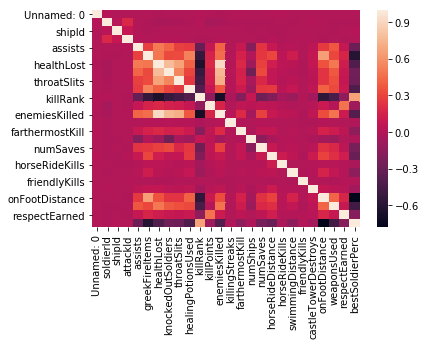

In [181]:
plt.figure()
sns.heatmap(data.corr())

In [251]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify = y, random_state = 1)

In [250]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(X,y)

array([[7.94481805e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.86821705e-03, 7.37921906e-01],
       [7.12463076e-01, 0.00000000e+00, 5.67740407e-04, ...,
        0.00000000e+00, 1.40891473e-01, 7.60423561e-01],
       [2.36440199e-01, 0.00000000e+00, 2.36854571e-02, ...,
        0.00000000e+00, 1.31395349e-01, 7.14096625e-01],
       ...,
       [9.20222907e-01, 0.00000000e+00, 1.21743250e-03, ...,
        0.00000000e+00, 5.23643411e-03, 7.37921906e-01],
       [3.47516393e-01, 2.14285714e-01, 6.00189484e-02, ...,
        0.00000000e+00, 2.50000000e-01, 7.37921906e-01],
       [2.92941990e-01, 0.00000000e+00, 2.40170535e-02, ...,
        0.00000000e+00, 1.42538760e-02, 7.36598279e-01]])

In [233]:
import sklearn
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(max_depth=10,random_state = 0)
DT.fit(X_train, y_train)
pr = DT.predict(X_test)
score = accuracy_score(y_test,pr)
score

0.7467619047619047

In [41]:
DT.score(X_test, y_test)

0.7344285714285714

In [12]:
xg_reg = xgb.XGBRegressor(max_depth = 10, n_estimators = 100, random_state = 0,n_jobs = 4)
xg_reg.fit(X_train,y_train)
pr2 = xg_reg.predict(X_test)

In [14]:
s2 = rms_score(y_test,pr2)

NameError: name 'rms_score' is not defined

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', random_state = 0)
svm.fit(X,y)
pr3 = svm.predict(X_test)
score3 = accuracy_score(y_test,pr3)
score3

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=850,min_samples_leaf = 2,min_samples_split = 3,max_depth = 20,random_state=0,n_jobs = 1000)
rf.fit(X_train, y_train)

In [248]:
pr4 = rf.predict(X_test)
score4 = accuracy_score(y_test,pr4)
score4

0.7756190476190477

In [ ]:
rf.score(X_test,y_test)

In [262]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 140,leaf_size = 60, p = 12,n_jobs = 100)
KNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=60, metric='minkowski',
           metric_params=None, n_jobs=100, n_neighbors=140, p=12,
           weights='uniform')

In [263]:
pr8 = KNN.predict(X_test)
score = accuracy_score(y_test,pr8)
score

0.6377619047619048

In [253]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(max_depth = 7,n_estimators = 300,random_state = 0)

In [254]:
model.fit(X_train, y_train)
pr7 = model.predict(X_test)
score = accuracy_score(y_test,pr7)
score

KeyboardInterrupt: 

In [11]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X, y)

y_pred = DT.predict(test1)

In [12]:
df_soln = pd.DataFrame(data = [test['soldierId'], y_pred], index = None)
df = df_soln.transpose()
df['soldierId'] = df['soldierId'].astype(float)
df.columns = ['soldierId','bestSoldierPerc']
df['bestSoldierPerc'] = df['bestSoldierPerc'].astype(int)
df.to_csv('soln3.csv',index = False)

In [83]:
rf.score(X_test, y_test)

ValueError: Number of features of the model must match the input. Model n_features is 24 and input n_features is 25 